# Data Exploration and Cleanup

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the DF and display the info
NBA_Data=pd.read_csv("./Potential Data Sets/NBA Free Throw Data.csv")
NBA_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 16 columns):
Team            630 non-null object
Season          630 non-null object
Venue           420 non-null object
Wins            630 non-null int64
Loss            630 non-null int64
Win%            630 non-null float64
FT Made         630 non-null int64
FT Att          630 non-null int64
FT%             630 non-null float64
Win Rnk         630 non-null int64
Loss Rnk        630 non-null int64
Win% Rnk        630 non-null int64
FT Made Rnk     630 non-null int64
FT ATT Rnk      630 non-null int64
FT% Rnk         630 non-null int64
Total Points    630 non-null int64
dtypes: float64(2), int64(11), object(3)
memory usage: 78.8+ KB


In [93]:
# Fill the null values with the word Total as the null values are both the home and away games.
NBA_Data["Venue"].fillna('Total',inplace = True)

#display the df info
NBA_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 16 columns):
Team            630 non-null object
Season          630 non-null object
Venue           630 non-null object
Wins            630 non-null int64
Loss            630 non-null int64
Win%            630 non-null float64
FT Made         630 non-null int64
FT Att          630 non-null int64
FT%             630 non-null float64
Win Rnk         630 non-null int64
Loss Rnk        630 non-null int64
Win% Rnk        630 non-null int64
FT Made Rnk     630 non-null int64
FT ATT Rnk      630 non-null int64
FT% Rnk         630 non-null int64
Total Points    630 non-null int64
dtypes: float64(2), int64(11), object(3)
memory usage: 78.8+ KB


# Team Name Repeats

Charlotte Bobcats became Charlotte Hornets

New Orleans Hornets became the New Orleans Pelicans

Los Angeles Clippers became LA Clippers

In [89]:
# Display the team name repeats
print(NBA_Data["Team"].nunique())
print(NBA_Data["Team"].unique())

33
['Atlanta Hawks' 'Boston Celtics' 'Brooklyn Nets' 'Charlotte Bobcats'
 'Chicago Bulls' 'Cleveland Cavaliers' 'Dallas Mavericks' 'Denver Nuggets'
 'Detroit Pistons' 'Golden State Warriors' 'Houston Rockets'
 'Indiana Pacers' 'Los Angeles Clippers' 'Los Angeles Lakers'
 'Memphis Grizzlies' 'Miami Heat' 'Milwaukee Bucks'
 'Minnesota Timberwolves' 'New Orleans Hornets' 'New York Knicks'
 'Oklahoma City Thunder' 'Orlando Magic' 'Philadelphia 76ers'
 'Phoenix Suns' 'Portland Trail Blazers' 'Sacramento Kings'
 'San Antonio Spurs' 'Toronto Raptors' 'Utah Jazz' 'Washington Wizards'
 'New Orleans Pelicans' 'Charlotte Hornets' 'LA Clippers']


In [90]:
NBA_Data["Team"].replace("Los Angeles Clippers","LA Clippers", inplace=True)
NBA_Data["Team"].replace("Charlotte Bobcats","Charlotte Hornets" ,inplace=True)
NBA_Data["Team"].replace("New Orleans Hornets" ,"New Orleans Pelicans", inplace=True)
print(NBA_Data["Team"].nunique())
print(NBA_Data["Team"].unique())

30
['Atlanta Hawks' 'Boston Celtics' 'Brooklyn Nets' 'Charlotte Hornets'
 'Chicago Bulls' 'Cleveland Cavaliers' 'Dallas Mavericks' 'Denver Nuggets'
 'Detroit Pistons' 'Golden State Warriors' 'Houston Rockets'
 'Indiana Pacers' 'LA Clippers' 'Los Angeles Lakers' 'Memphis Grizzlies'
 'Miami Heat' 'Milwaukee Bucks' 'Minnesota Timberwolves'
 'New Orleans Pelicans' 'New York Knicks' 'Oklahoma City Thunder'
 'Orlando Magic' 'Philadelphia 76ers' 'Phoenix Suns'
 'Portland Trail Blazers' 'Sacramento Kings' 'San Antonio Spurs'
 'Toronto Raptors' 'Utah Jazz' 'Washington Wizards']


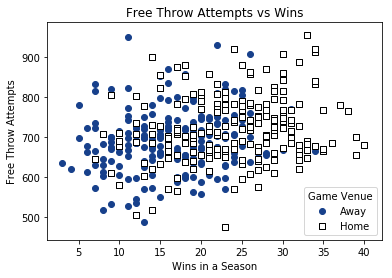

In [100]:
# Create 3 dataframes for home away and total

away=NBA_Data.loc[NBA_Data["Venue"] == "Road"]
home=NBA_Data.loc[NBA_Data["Venue"] == "Home"]
total=NBA_Data.loc[NBA_Data["Venue"] == "Total"]


plt.scatter(away["Wins"],away["FT Made"], marker="o", color="#17408B")
plt.scatter(home["Wins"],home["FT Made"], marker="s", edgecolors="black", color="#FFFFFF")
#plt.scatter(total["Wins"],total["FT Made"], marker="s", color="#C9082A")

plt.xlabel("Wins in a Season")
plt.ylabel("Successful Free Throws")
plt.title("Successful Free Throws vs Wins")
# Create a legend
lgnd = plt.legend(labels=["Away","Home"],numpoints=1,title="Game Venue", loc="lower right")



In [69]:
Win_Rank=total.groupby("Win Rnk").mean()
Win_Rank.head()

,Wins,Loss,Win%,FT Made,FT Att,FT%,Loss Rnk,Win% Rnk,FT Made Rnk,FT ATT Rnk,FT% Rnk,Total Points
Win Rnk,,,,,,,,,,,,
1,65.571429,16.000000,0.803571,1410.428571,1823.857143,0.773429,1.000,1.0,16.571429,18.142857,11.285714,9079.285714
2,60.285714,21.428571,0.737857,1491.285714,1858.571429,0.801429,2.000,2.0,13.142857,17.142857,3.571429,8744.714286
3,56.500000,25.125000,0.692125,1469.875000,1944.875000,0.759500,2.875,3.0,12.500000,13.000000,16.375000,8897.250000
4,55.000000,26.500000,0.674833,1465.666667,1916.666667,0.765833,4.000,4.0,13.333333,13.833333,14.666667,8534.166667
5,53.357143,28.500000,0.652000,1494.357143,1961.071429,0.763143,5.000,5.0,10.857143,11.071429,15.357143,8609.642857


Text(0.5,1,'Seasonal Rank vs FT%')

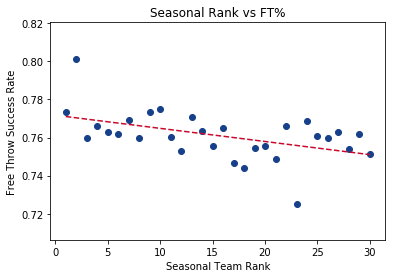

In [101]:
x=Win_Rank.index
y=Win_Rank["FT%"]
plt.scatter(x,y, color="#17408B" )

# Add trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), linestyle="--" ,color="#C9082A" )

plt.xlabel("Seasonal Team Rank")
plt.ylabel("Free Throw Success Rate")
plt.title("Seasonal Rank vs FT%")
